In [70]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
df=pd.read_csv('Zomatodataset\zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [72]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [74]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## in Data analysis what will be doing 
- misssing values 
- exprorating catogrical feature 
- exproring   numerical feature 
- finding realaion beatween feature

#### here i am  trying to find missing values in data frame

1. first method 

In [75]:
df['Restaurant ID'].isnull().sum() ==True

False

In [76]:
mof=[]
for x in df.columns:
    if (df[x].isnull().sum())>0:
        mof.append(x)
print(mof)

['Cuisines']


In [77]:
def  Col_Null() :
    mof=[] # local list
    
    for x in df.columns:
        fetures =df[x].isnull().sum()
        if (fetures>0):
            mof.append(x)
            
    return mof
print(Col_Null())

['Cuisines']


In [78]:
##list comperhention
[ feature for feature in df.columns if df[feature].isnull().sum() > 0]

['Cuisines']

<AxesSubplot:>

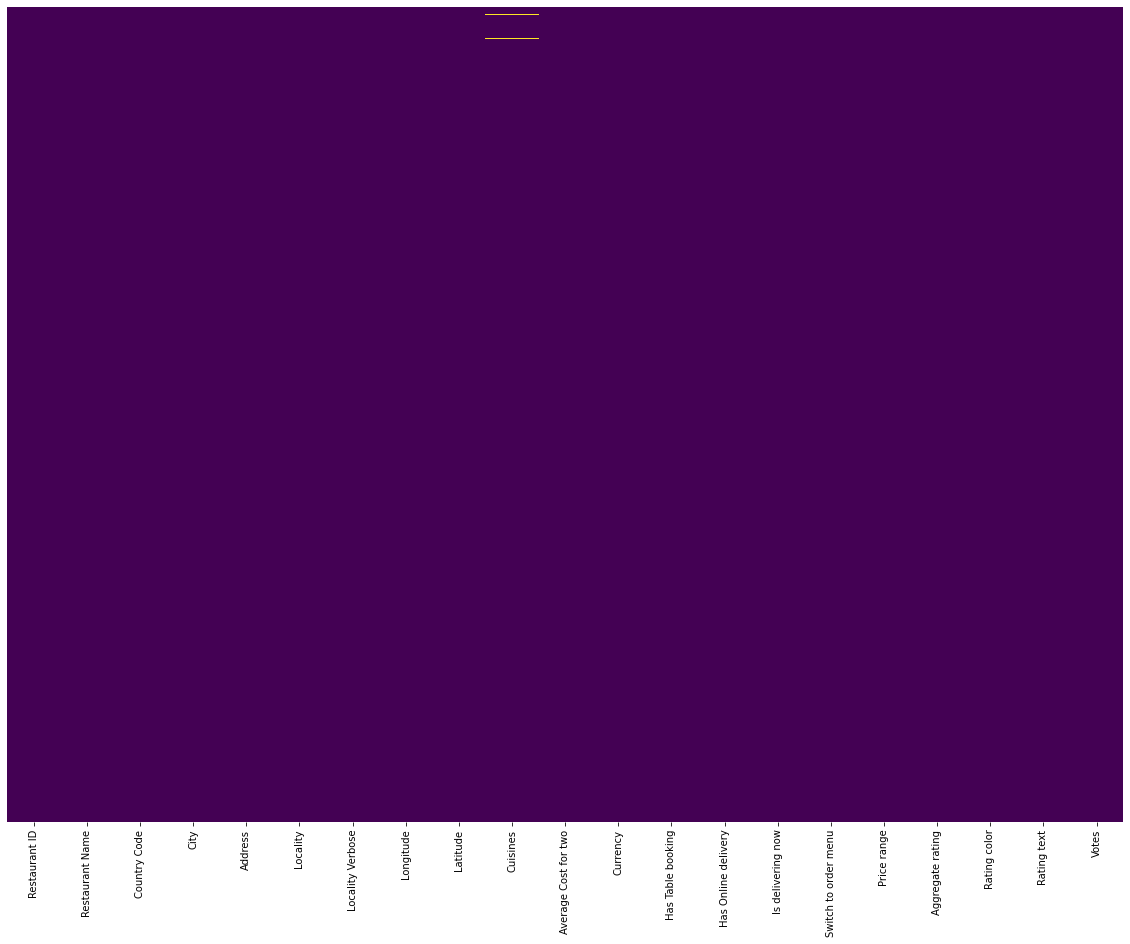

In [79]:
#second option using sns 
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [80]:
df_country=pd.read_excel('Zomatodataset\Country-Code.xlsx')
#df_country[df_country['Country Code']==162].count()
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [81]:
final_df=pd.merge(df,df_country,on ='Country Code',how="left")
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [82]:
final_df.shape

(9551, 22)

In [83]:
country_name=final_df.Country.value_counts().index
country_value=final_df.Country.value_counts().values
print(country_value)

[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


([<matplotlib.patches.Wedge at 0x237fbc88910>,
 [Text(-1.6244614051428155, 0.28918012241755087, 'India'),
  Text(1.6159225737575342, -0.3336079070118495, 'United States'),
  Text(1.6493797730734552, -0.0452367569146811, 'United Kingdom')],
 [Text(-0.8860698573506265, 0.157734612227755, '94%'),
  Text(0.8814123129586549, -0.1819679492791906, '5%'),
  Text(0.8996616944037026, -0.02467459468073514, '1%')])

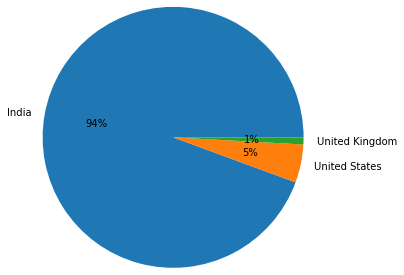

In [84]:
plt.pie( country_value[:3],labels=country_name[:3],radius=1.5,autopct='%1.0f%%' )

In [85]:
final_df.columns
final_df['Rating text']

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object

In [86]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [87]:
rating=final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'rating count'})


<AxesSubplot:xlabel='Aggregate rating', ylabel='rating count'>

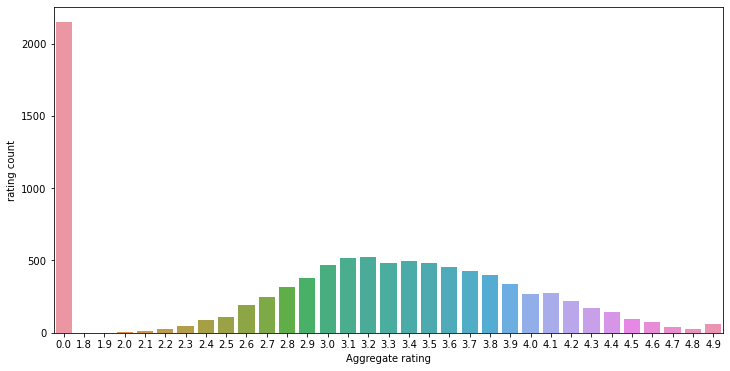

In [88]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y='rating count',data =rating)

<AxesSubplot:xlabel='Aggregate rating', ylabel='rating count'>

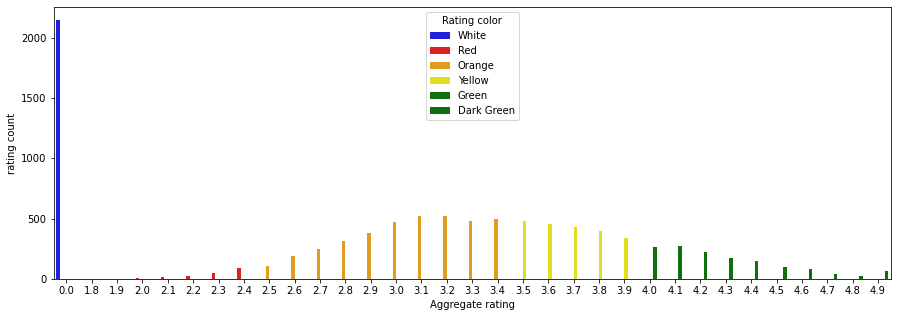

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(x='Aggregate rating',y='rating count',hue='Rating color',palette=['blue','red','orange','yellow','green','green'],data =rating)

In [90]:
final_df[final_df['Rating color']=='White'].groupby(['Country','Aggregate rating']).size().reset_index()

,Country,Aggregate rating,0
0,Brazil,0.0,5
1,India,0.0,2139
2,United Kingdom,0.0,1
3,United States,0.0,3


In [91]:
stg_agre=final_df.groupby(['Country','Aggregate rating']).size().reset_index()
stg_agre[stg_agre['Aggregate rating']==0].sort_values(0,ascending=False)

,Country,Aggregate rating,0
37,India,0.0,2139
12,Brazil,0.0,5
200,United States,0.0,3
180,United Kingdom,0.0,1


obesrvetion are
1. maximum number of people dont rating 
2. so much are rating zero from india 

In [92]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [93]:
# This cool to run query fast enough rather than on all dataset
final_df[['Currency','Country']].groupby(['Currency','Country']).size().reset_index()
final_df.groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [94]:
#which country has online delivery option
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [95]:
#13.5.islower()

In [96]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x237fc20d4b0>,
 [Text(-0.6207499702746028, 0.9081131396495042, 'New Delhi'),
  Text(0.07888824382658387, -1.0971675555656746, 'Gurgaon'),
  Text(0.8905335390443715, -0.6457166683903298, 'Noida'),
  Text(1.0945551812130687, -0.10931127700117002, 'Faridabad')],
 [Text(-0.338590892877056, 0.4953344398088204, '69%'),
  Text(0.043029951178136655, -0.5984550303085497, '14%'),
  Text(0.4857455667514753, -0.35220909184927074, '14%'),
  Text(0.597030098843492, -0.05962433290972909, '3%')])

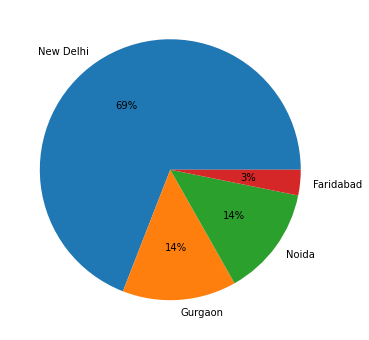

In [97]:
city_names=final_df['City'].value_counts().index

city_values=final_df['City'].value_counts().values
plt.pie(city_values[:4],labels=city_names[0:4],autopct='%1.0f%%')


## Assignment
### Find The Top 10 Cusin

(cusin_val[0:7],labels=cusin_index[0:7])

In [98]:
data=final_df['Cuisines'].unique()
list_cusin=[cusin for cusin in data ]
print(len(list_cusin))

1826


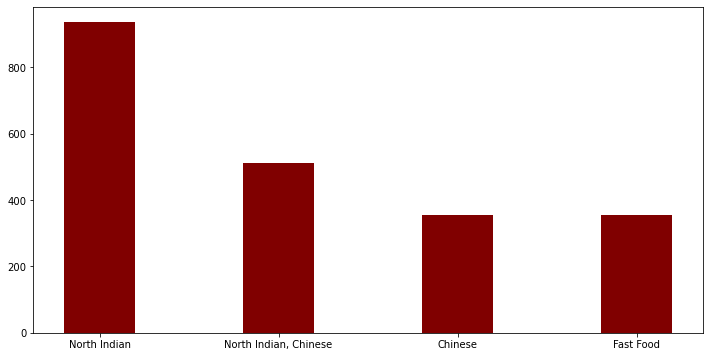

In [99]:
cusin_val=final_df['Cuisines'].value_counts().values
cusin_index=final_df['Cuisines'].value_counts().index
plt.bar(cusin_index[0:4],cusin_val[0:4],color ='maroon', width = 0.4)
plt.show()

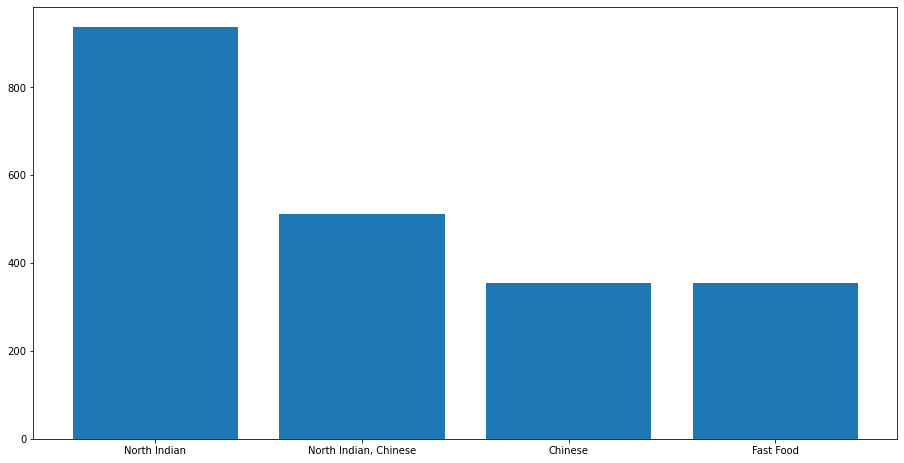

In [100]:

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(cusin_index[:4],cusin_val[:4])
plt.show()

Text(0, 0.5, 'No. of Cusin')

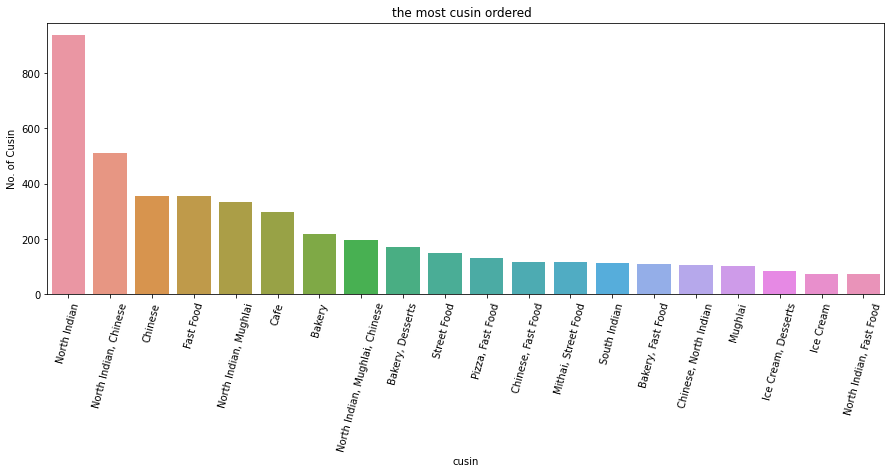

In [101]:
plt.figure(figsize=(15, 5))
#highest_sport = df['Sport'].value_counts().index
sns.countplot(data=final_df, x='Cuisines', order=cusin_index[:20])
plt.xticks(rotation=75)
plt.title('the most cusin ordered  ')
plt.xlabel('cusin')
plt.ylabel('No. of Cusin')


In [102]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [103]:
final_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [104]:
final_df['Votes'].unique()
new_frame=final_df.groupby(['Country','Votes']).sum().reset_index().sort_values('Votes',ascending=False)
new_frame

,Country,Votes,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating
929,India,10934,51705,1,77.640709,12.979166,2000,4,4.8
928,India,9667,51040,1,77.614293,12.933298,800,2,4.7
927,India,7931,308322,1,77.194471,28.554285,1600,3,4.3
926,India,7574,20404,1,88.352885,22.552672,1000,3,4.3
925,India,6907,56618,1,77.699386,12.949934,1400,3,4.6
...,...,...,...,...,...,...,...,...,...
1287,United States,1,18491935,216,-112.448530,42.891174,25,2,0.0
24,Brazil,1,7305048,30,-43.341164,-22.870413,70,3,0.0
60,India,1,7244429164,481,32696.256768,12127.101253,162210,589,0.0
23,Brazil,0,6710645,30,-46.675667,-23.581000,55,2,0.0


## To show how many country are voted

In [105]:
voted_data=final_df[['Country','Votes']].groupby('Country').sum().reset_index().sort_values('Votes',ascending=False)
#final_df['Country']=

# To visualize it using bar 

<BarContainer object of 5 artists>

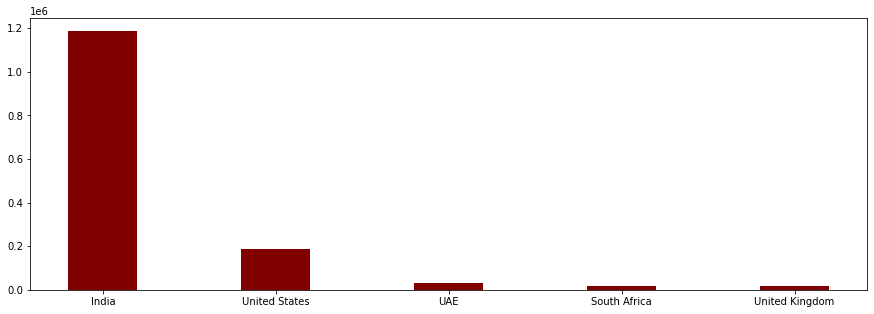

In [106]:
plt.figure(figsize=(15, 5))
plt.bar(voted_data['Country'][0:5],voted_data['Votes'][0:5],color ='maroon', width = 0.4)

In [107]:
voted_data=final_df[['Country','Votes']].groupby('Country').sum().reset_index().sort_values('Votes',ascending=False)


Text(0, 0.5, 'No. of voted country')

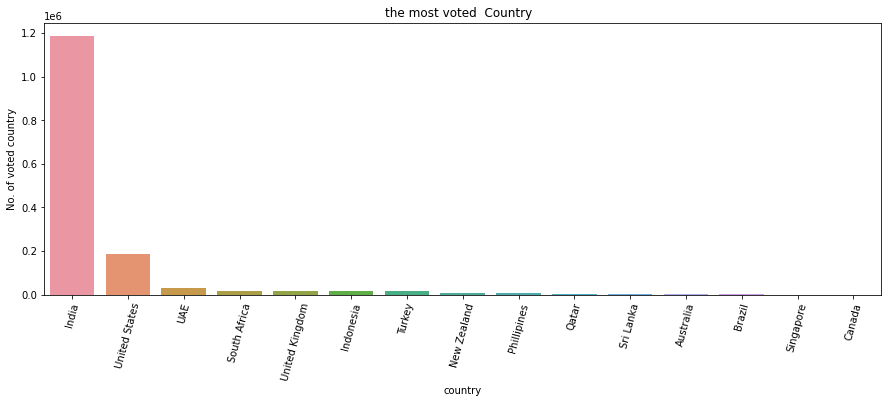

In [108]:
plt.figure(figsize=(15, 5))
#highest_sport = df['Sport'].value_counts().index
sns.barplot(data=voted_data, x=voted_data['Country'],y=voted_data['Votes'],)
plt.xticks(rotation=75)
plt.title('the most voted  Country  ')
plt.xlabel('country')
plt.ylabel('No. of voted country')


In [109]:
final_df[['Country','Cuisines','Price range']].groupby(['Country','Cuisines','Price range']).mean().reset_index()

,Country,Cuisines,Price range
0,Australia,Asian,2
1,Australia,Australian,2
2,Australia,"Bar Food, Modern Australian",3
3,Australia,"Bar Food, Steak",2
4,Australia,"Breakfast, Coffee and Tea",1
...,...,...,...
2455,United States,Tapas,2
2456,United States,Thai,1
2457,United States,Thai,2
2458,United States,Thai,3


In [110]:
#trying to put percent on each categorical value on bar  
#fixing issue on  y-axis
#getting our color
base_color=sns.color_palette()[0]
secand_color=sns.color_palette()[-3]
#getting y and x data 
#data
data=voted_data
x=voted_data['Country']
y=voted_data['Votes']



In [154]:
n_points=final_df.shape[0]
order_type=final_df['Country'].value_counts().index
type_count =final_df['Country'].value_counts().values
max_type_counts=type_count[0]
max_prop= max_type_counts/n_points
print(max_prop)

0.9058737304994241


In [164]:
ticks_props=np.arange(0,max_prop,0.1)
ticks_names=['{:0.2f}'.format(v) for v in ticks_props ]
print(ticks_names)

['0.00', '0.10', '0.20', '0.30', '0.40', '0.50', '0.60', '0.70', '0.80', '0.90']


Text(0.5, 0, 'Proportion')

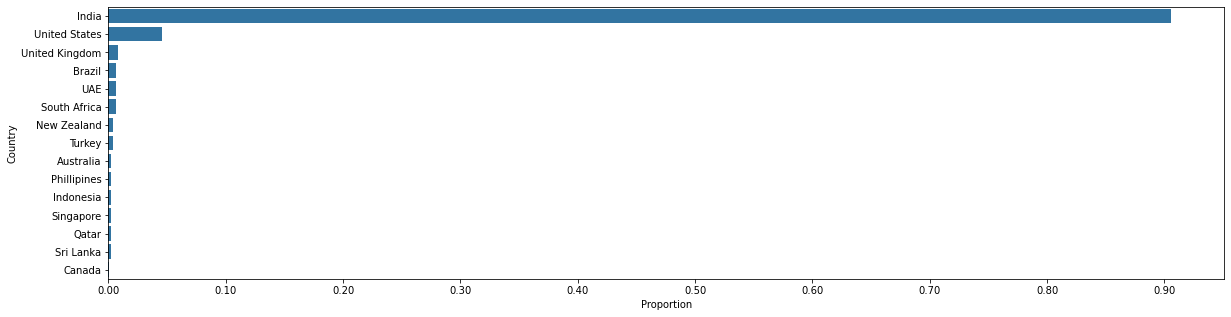

In [165]:
plt.figure(figsize=(20,5))
sns.countplot(data=final_df,y=final_df['Country'],color=base_color,order=order_type);
plt.xticks(ticks_props*n_points,ticks_names)
plt.xlabel('Proportion')

#plt.text(count+1)



In [171]:
df.isnull().sum().index.values

array(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'], dtype=object)

In [3]:
fence_robot_angle=input("")
if fence_robot_angle  >30:
    print ('Yes')
else :
    print('No')


TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
val = input("Enter your value: ")
print(val)

: 